## Statistics 504 - Fall 2015
### Class Project Proposal
### Erich Seamon
### erichs@uidaho.edu
### http://webpages.uidaho.edu/erichs
#       

### Title: " Exploring landslide likelihood across Washington using ensemble machine learning techniques"

### Introduction


The premise of this research will be to identify areas within the state of Washington that are susceptible to future landslides, based on the knowledge of past landslide events, terrain parameters, geological attributes, as well as daily meteorological data (precipitation, temperature, solar radiation, relative humidity , wind speed) (Abatzoglou, Brown, 2011).  

Previous work by Ardizzone et al (2002), Ayalew and Yamagishi (2005), Ohlmacher and DAvid (2003), all used logistical regression as a classifer method for landslide analysis. To expand upon this work, this project will evaluate four differing models to predict landslide likelihood, based on historical and future climate scenario data sets:

-logistical regression, <br> 
-support vector analysis, <br>
-random forest, and <br>
-neural networks <br>


Under the above approach, landslide explanatory variables will be fitted or “trained” on a training data set of an observed landslide locations, with thematic data such as morphometric attributes (slope, aspect) as well as information on (geology, landuse, ). In this context, the misclassification rate for landslide potential, as measured using the test data, will be the primary quantitative measure for evaluating the predictive power the model (Efron and Gong, 1983; Efron and Tib- shirani, 1986).

### Data Sources

2007 and 2008 Landslide data for the state of Washington, containing over 52,000 observations, was accessed from the Washington Department of Natural Recreation (WA DNR).  The data was provided as a downloadable .gdb file (geodatabase file).  


#### Data Transformation before Analysis

The data was imported as a csv file - that was derived from the provided geodatabase file.  This csv file contained over 52,000 observations, with latitude and longitude included as well.  The csv file was transformed into a a pandas data frame, with text based categorical fields transformed to numeric values.  From this pandas data frame, our feature columns (X) and our response variable (y).

From the 52,000+ landslide observations:

-3695 had dates. This is essential to match up with specific climate values for that day, and for the days surrounding this date.

-Of these 3695 dates, 874 had both dates, geological unit values, as well as slope and gradient. This subset of 874 points are our final observation dataset.  


### Statistical Design

For this project, a machine learning process flow will be developed that fits the aforementioned algorithms (Random Forest, SVM, Logistical Regression, Neural Networks).  Then each model will be used for prediction and learning, as we iteratively identify optimal model tuning parameters.  

After refining the model - then a series of climate variables for a set of future scenarios will be run against the model, which should provide a landslide confidence level based on future climatic outcomes.

In [305]:
import PIL
import os,sys
from PIL import Image
basewidth = 500
img = Image.open("/git/stat504-python/stat504-project/data/landslide_information_flow.jpg")
wpercent = (basewidth / float(img.size[0]))
hsize = int((float(img.size[1]) * float(wpercent)))
img = img.resize((basewidth, hsize), PIL.Image.ANTIALIAS)
img.save("/git/stat504-python/stat504-project/data/landslide_information_flow_refined.jpg")

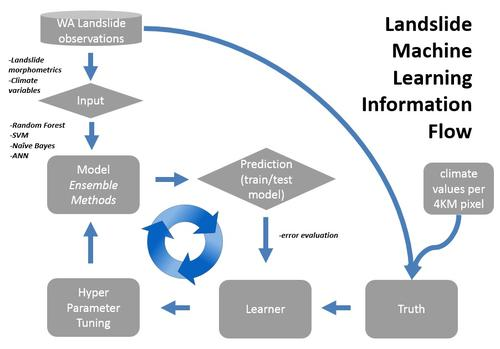

In [306]:
import os,sys
from PIL import Image
jpgfile = Image.open("/git/stat504-python/stat504-project/data/landslide_information_flow_refined.jpg")
jpgfile



### Feature Variables:

These are the variables that were collected for each of the 874 landslide observations:

1) Slope Shape (SLOPE_MORP)  CATEGORICAL - Planar, Convex, Concave, etc. <br>
2) Land Use (LAND_USE)  CATEGORICAL - Forestry, Road/Rail/Trail, Undistubed, Urban Development  <br>
3) Landslide Type (LANDSLIDE1)  CATEGORICAL - Debris Flows, Debris Slides and Avalanches, Shallow Undifferentiated, etc.<br>
4) Gradient (GRADIENT_D) CONTINUOUS - gradient of the landslide location, in degrees.<br> 
5) Geologic Unit (GEOLOGIC_U) CATEGORICAL - geologic unit. <br>
6) min temp <br>
7) max temp <br>
8) precipitation <br>
9) solar radiation <br>
10) specific humidity <br>


### Response Variable:

1) Landslide Confidence (LANDSLID_3) - Certain, Probable, Questionable, Unknown <br>



## Preliminary Data Import and Analysis

In [307]:
import matplotlib
%matplotlib nbagg

from pyproj import Proj
import StringIO
from pandas import DataFrame
import pandas as pd
import seaborn as sns
import pydot
from IPython.display import Image

from urllib2 import Request, urlopen
import json
from pandas.io.json import json_normalize
import numpy
from sklearn.cross_validation import cross_val_score

##### import csv file for all 52,000+WA landslides

In [308]:
import csv

#ifile  = open('/git/stat504-python/STAT504-PROJECT/data/WALandslides_export1.csv', "rb")
#reader = csv.reader(ifile)
#ifile.close()

In [309]:
walandslides_all = pd.read_csv('/git/stat504-python/stat504-project/data/WALandslides_export4.csv')

In [310]:
walandslides = pd.read_csv('/git/stat504-python/stat504-project/data/WALandslides_export5.csv')

In [311]:
walandslides

,OBJECTID_1,OBJECTID,LANDSLIDE_,LANDSLIDE1,DSLS_MORPH,LANDSLID_1,GRADIENT_D,GRADIENT_M,SLOPE_MORP,ASPECT,...,DATA_CONFI,COMMENTS,FEATURE_SO,SOURCE_INF,SOURCE_DB_,URL,SHAPE_Leng,ORIG_FID,POINT_X,POINT_Y
0,1,1,50,Debris slide and avalanches,Unknown,NaN,38,Gradient degrees determined from Lidar,Concave-planar,0,...,Low,Probably flowed onto Hwy 101,"December 3rd 2007 storm reconnaissance, DGER, DNR","Sarikhan, I. Y.; Stanton, K. D.; Contreras, T....",0,http://www.dnr.wa.gov/publications/ger_ofr2008...,350.759924,0,-123.088915,47.476685
1,2,2,51,Shallow undifferentiated,Unknown,NaN,34,Gradient degrees determined from Lidar,Planar,0,...,Low,NaN,"December 3rd 2007 storm reconnaissance, DGER, DNR","Sarikhan, I. Y.; Stanton, K. D.; Contreras, T....",0,http://www.dnr.wa.gov/publications/ger_ofr2008...,199.557245,1,-123.088312,47.477029
2,3,3,52,Debris slide and avalanches,Unknown,NaN,53,Gradient degrees determined from Lidar,Planar-convex,0,...,Low,Probably moved across Hwy 106,"December 3rd 2007 storm reconnaissance, DGER, DNR","Sarikhan, I. Y.; Stanton, K. D.; Contreras, T....",0,http://www.dnr.wa.gov/publications/ger_ofr2008...,634.614903,2,-123.053356,47.349413
3,4,4,53,Debris slide and avalanches,Unknown,NaN,51,Gradient degrees determined from Lidar,Concave-planar,0,...,Low,Probably moved across Hwy 106,"December 3rd 2007 storm reconnaissance, DGER, DNR","Sarikhan, I. Y.; Stanton, K. D.; Contreras, T....",0,http://www.dnr.wa.gov/publications/ger_ofr2008...,806.806661,3,-122.894125,47.401870
4,5,5,54,Shallow undifferentiated,Unknown,NaN,13,Gradient degrees determined from Lidar,Planar,0,...,Low,"Damaged North Shore Rd, at least one lane","December 3rd 2007 storm reconnaissance, DGER, DNR","Sarikhan, I. Y.; Stanton, K. D.; Contreras, T....",0,http://www.dnr.wa.gov/publications/ger_ofr2008...,232.313240,4,-122.980466,47.394887
5,6,6,55,Debris slide and avalanches,Unknown,NaN,37,Gradient degrees determined from Lidar,Planar,0,...,Low,Moved across two lanes of the North Shore Road...,"December 3rd 2007 storm reconnaissance, DGER, DNR","Sarikhan, I. Y.; Stanton, K. D.; Contreras, T....",0,http://www.dnr.wa.gov/publications/ger_ofr2008...,272.318033,5,-122.996276,47.386840
6,7,7,56,Shallow undifferentiated,Unknown,NaN,32,Gradient degrees determined from Lidar,Planar,0,...,Low,"Damaged at least driveway, house?","December 3rd 2007 storm reconnaissance, DGER, DNR","Sarikhan, I. Y.; Stanton, K. D.; Contreras, T....",0,http://www.dnr.wa.gov/publications/ger_ofr2008...,167.461072,6,-123.016458,47.376396
7,8,8,57,Shallow undifferentiated,Unknown,NaN,31,Gradient degrees determined from Lidar,Planar,0,...,Low,NaN,"December 3rd 2007 storm reconnaissance, DGER, DNR","Sarikhan, I. Y.; Stanton, K. D.; Contreras, T....",0,http://www.dnr.wa.gov/publications/ger_ofr2008...,171.645621,7,-123.015265,47.377505
8,9,9,58,Debris slide and avalanches,Unknown,NaN,40,Gradient degrees determined from Lidar,Concave-planar,0,...,Low,Damaged North Shore Rd,"December 3rd 2007 storm reconnaissance, DGER, DNR","Sarikhan, I. Y.; Stanton, K. D.; Contreras, T....",0,http://www.dnr.wa.gov/publications/ger_ofr2008...,222.684205,8,-123.019591,47.370388
9,10,10,59,Debris slide and avalanches,Unknown,NaN,38,Gradient degrees determined from Lidar,Concave-planar,0,...,Low,NaN,"December 3rd 2007 storm reconnaissance, DGER, DNR","Sarikhan, I. Y.; Stanton, K. D.; Contreras, T....",0,http://www.dnr.wa.gov/publications/ger_ofr2008...,345.299735,9,-122.951103,47.437622


##### Plot all 52,000+ WA landslides

<IPython.core.display.Javascript object>


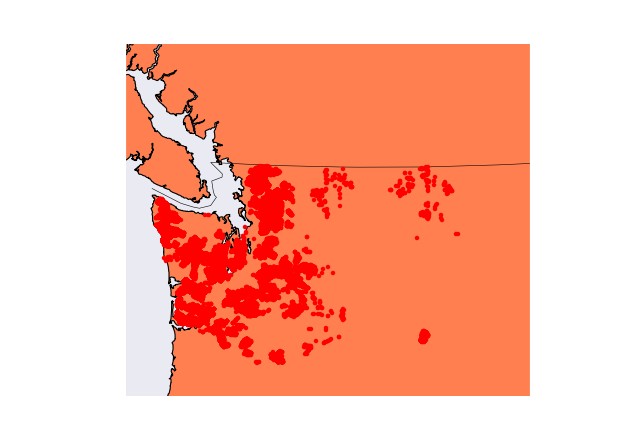

In [325]:

from mpl_toolkits.basemap import Basemap
import matplotlib.pyplot as plt
import numpy as np

%matplotlib nbagg

#my_map = Basemap(projection='ortho',lon_0=-105,lat_0=40,resolution='l')

# make sure the value of resolution is a lowercase L,
#  for 'low', not a numeral 1
#my_map = Basemap(projection='ortho', lat_0=50, lon_0=-100,
#             resolution='l', area_thresh=500)

my_map2 = Basemap(llcrnrlon=-125, llcrnrlat=45, urcrnrlon=-115,
     urcrnrlat=51, projection='tmerc', lat_1=33, lat_2=45,
     lon_0=-119, lat_0=45, resolution='h', area_thresh=10000)

my_map2.drawcoastlines()
my_map2.drawcountries()
my_map2.fillcontinents(color='coral')

lon2 = np.array(walandslides_all.POINT_X)
lat2 = np.array(walandslides_all.POINT_Y)

lon = np.array(walandslides.POINT_X)
lat = np.array(walandslides.POINT_Y)

y2,x2 = my_map2(lon2, lat2)

y,x = my_map2(lon, lat)

my_map2.plot(y2,x2, 'ro', markersize=4, markeredgecolor = 'k')
#my_map2.plot(y,x, 'ro', markersize=4, markeredgecolor = 'k')

#my_map2.plot(y,x, 'ro', markersize=4) # plots oregon data
#cbar = plt.colorbar(sc, shrink = .5)

plt.show()

### Set geologic units as numeric

In [313]:
stringh = set(walandslides.GEOLOGIC_U)
l = list(stringh)
l2 = list(range(1, 106))

In [314]:
i = iter(l)
j = iter(l2)
k = list(zip(i, j))

#outRes = dict((l[i], l[i+1]) if i+1 < len(l) else (l[i], '') for i in xrange(len(l)))
kdict = dict(k)
kdict.values()

walandslides['GEOLOGIC_U'].replace(kdict, inplace=True)
#print walandslides.GEOLOGIC_U

### Set landslide type as numeric

In [315]:
stringh1 = set(walandslides.LANDSLIDE1)
J = list(stringh1)
J2 = list(range(1, 106))

In [316]:
i2 = iter(J)
j2 = iter(J2)
k2 = list(zip(i2, j2))

#outRes = dict((l[i], l[i+1]) if i+1 < len(l) else (l[i], '') for i in xrange(len(l)))
kdict2 = dict(k2)
kdict2.values()

walandslides['LANDSLIDE1'].replace(kdict2, inplace=True)
#print walandslides.LANDSLIDE1

### Convert categorical columns to numerical

In [317]:
walandslides['DATA_CONFI'] = walandslides.DATA_CONFI.map({'Low':0, 'Moderate-High':1})
walandslides['SLOPE_MORP'] = walandslides.SLOPE_MORP.map({'Planar':0, 'Concave-Planar':1, 'Concave, convergent':2, 'Planar-Concave':3, 'Planar-convex':4})
walandslides['LANDSLID_3'] = walandslides.LANDSLID_3.map({'Questionable':0, 'Probable':1, 'Certain':2, 'Unknown':3})

In [318]:
walandslides = walandslides[np.isfinite(walandslides['SLOPE_MORP'])]
walandslides = walandslides[np.isfinite(walandslides['LANDSLIDE1'])]
walandslides = walandslides[np.isfinite(walandslides['DATA_CONFI'])]

#walandslides.loc[walandslides['GEOLOGIC_U'] == 'Evb(gr)'] = 65
#walandslides.loc[walandslides['LANDSLID_3'] == 'Unknown'] = 65
#walandslides = walandslides[walandslides.LANDSLIDE1.str.contains("nan") == False]

feature_cols = ['GEOLOGIC_U', 'SLOPE_MORP', 'LANDSLIDE1', 'GRADIENT_D', 'ASPECT', 'DATA_CONFI']
class_cols = ['DATA_CONFI']
#feature_cols = ['LANDSLIDE1']
X = walandslides[feature_cols]
y = walandslides.LANDSLID_3

In [319]:
y = pd.concat([y], axis=1)

In [320]:
walandslides

,OBJECTID_1,OBJECTID,LANDSLIDE_,LANDSLIDE1,DSLS_MORPH,LANDSLID_1,GRADIENT_D,GRADIENT_M,SLOPE_MORP,ASPECT,...,DATA_CONFI,COMMENTS,FEATURE_SO,SOURCE_INF,SOURCE_DB_,URL,SHAPE_Leng,ORIG_FID,POINT_X,POINT_Y
1,2,2,51,4,Unknown,NaN,34,Gradient degrees determined from Lidar,0,0,...,0,NaN,"December 3rd 2007 storm reconnaissance, DGER, DNR","Sarikhan, I. Y.; Stanton, K. D.; Contreras, T....",0,http://www.dnr.wa.gov/publications/ger_ofr2008...,199.557245,1,-123.088312,47.477029
2,3,3,52,5,Unknown,NaN,53,Gradient degrees determined from Lidar,4,0,...,0,Probably moved across Hwy 106,"December 3rd 2007 storm reconnaissance, DGER, DNR","Sarikhan, I. Y.; Stanton, K. D.; Contreras, T....",0,http://www.dnr.wa.gov/publications/ger_ofr2008...,634.614903,2,-123.053356,47.349413
4,5,5,54,4,Unknown,NaN,13,Gradient degrees determined from Lidar,0,0,...,0,"Damaged North Shore Rd, at least one lane","December 3rd 2007 storm reconnaissance, DGER, DNR","Sarikhan, I. Y.; Stanton, K. D.; Contreras, T....",0,http://www.dnr.wa.gov/publications/ger_ofr2008...,232.313240,4,-122.980466,47.394887
5,6,6,55,5,Unknown,NaN,37,Gradient degrees determined from Lidar,0,0,...,0,Moved across two lanes of the North Shore Road...,"December 3rd 2007 storm reconnaissance, DGER, DNR","Sarikhan, I. Y.; Stanton, K. D.; Contreras, T....",0,http://www.dnr.wa.gov/publications/ger_ofr2008...,272.318033,5,-122.996276,47.386840
6,7,7,56,4,Unknown,NaN,32,Gradient degrees determined from Lidar,0,0,...,0,"Damaged at least driveway, house?","December 3rd 2007 storm reconnaissance, DGER, DNR","Sarikhan, I. Y.; Stanton, K. D.; Contreras, T....",0,http://www.dnr.wa.gov/publications/ger_ofr2008...,167.461072,6,-123.016458,47.376396
7,8,8,57,4,Unknown,NaN,31,Gradient degrees determined from Lidar,0,0,...,0,NaN,"December 3rd 2007 storm reconnaissance, DGER, DNR","Sarikhan, I. Y.; Stanton, K. D.; Contreras, T....",0,http://www.dnr.wa.gov/publications/ger_ofr2008...,171.645621,7,-123.015265,47.377505
12,13,13,62,3,Unknown,NaN,43,Gradient degrees determined from Lidar,2,0,...,0,Resident indicated landslide/flooding started ...,"December 3rd 2007 storm reconnaissance, DGER, DNR","Sarikhan, I. Y.; Stanton, K. D.; Contreras, T....",0,http://www.dnr.wa.gov/publications/ger_ofr2008...,3692.257163,12,-123.105238,47.407658
13,14,14,63,4,Unknown,NaN,38,Gradient degrees determined from Lidar,0,0,...,0,NaN,"December 3rd 2007 storm reconnaissance, DGER, DNR","Sarikhan, I. Y.; Stanton, K. D.; Contreras, T....",0,http://www.dnr.wa.gov/publications/ger_ofr2008...,285.802081,13,-123.103677,47.410134
14,15,15,64,3,Unknown,NaN,49,Gradient degrees determined from Lidar,2,0,...,0,NaN,"December 3rd 2007 storm reconnaissance, DGER, DNR","Sarikhan, I. Y.; Stanton, K. D.; Contreras, T....",0,http://www.dnr.wa.gov/publications/ger_ofr2008...,4694.453697,14,-123.098720,47.420222
15,16,16,65,4,Unknown,NaN,39,Gradient degrees determined from Lidar,0,0,...,0,NaN,"December 3rd 2007 storm reconnaissance, DGER, DNR","Sarikhan, I. Y.; Stanton, K. D.; Contreras, T....",0,http://www.dnr.wa.gov/publications/ger_ofr2008...,339.143690,15,-123.087589,47.435019


### Plotting refined landslides after elimination of NANs and missing values - 874 rows

<IPython.core.display.Javascript object>


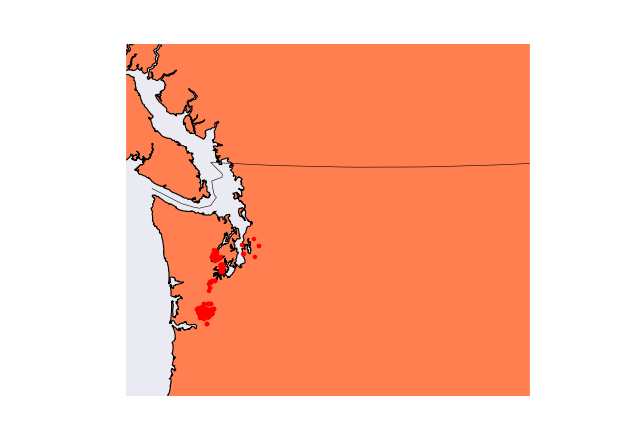

In [321]:
%matplotlib nbagg

my_map2 = Basemap(llcrnrlon=-125, llcrnrlat=45, urcrnrlon=-115,
     urcrnrlat=51, projection='tmerc', lat_1=33, lat_2=45,
     lon_0=-119, lat_0=45, resolution='h', area_thresh=10000)

my_map2.drawcoastlines()
my_map2.drawcountries()
my_map2.fillcontinents(color='coral')

lon = np.array(walandslides.POINT_X)
lat = np.array(walandslides.POINT_Y)

ypoint,xpoint = my_map2(lon, lat)

my_map2.plot(ypoint,xpoint, 'ro', markersize=4, markeredgecolor = 'k')
plt.show()

In [322]:
walandslides

,OBJECTID_1,OBJECTID,LANDSLIDE_,LANDSLIDE1,DSLS_MORPH,LANDSLID_1,GRADIENT_D,GRADIENT_M,SLOPE_MORP,ASPECT,...,DATA_CONFI,COMMENTS,FEATURE_SO,SOURCE_INF,SOURCE_DB_,URL,SHAPE_Leng,ORIG_FID,POINT_X,POINT_Y
1,2,2,51,4,Unknown,NaN,34,Gradient degrees determined from Lidar,0,0,...,0,NaN,"December 3rd 2007 storm reconnaissance, DGER, DNR","Sarikhan, I. Y.; Stanton, K. D.; Contreras, T....",0,http://www.dnr.wa.gov/publications/ger_ofr2008...,199.557245,1,-123.088312,47.477029
2,3,3,52,5,Unknown,NaN,53,Gradient degrees determined from Lidar,4,0,...,0,Probably moved across Hwy 106,"December 3rd 2007 storm reconnaissance, DGER, DNR","Sarikhan, I. Y.; Stanton, K. D.; Contreras, T....",0,http://www.dnr.wa.gov/publications/ger_ofr2008...,634.614903,2,-123.053356,47.349413
4,5,5,54,4,Unknown,NaN,13,Gradient degrees determined from Lidar,0,0,...,0,"Damaged North Shore Rd, at least one lane","December 3rd 2007 storm reconnaissance, DGER, DNR","Sarikhan, I. Y.; Stanton, K. D.; Contreras, T....",0,http://www.dnr.wa.gov/publications/ger_ofr2008...,232.313240,4,-122.980466,47.394887
5,6,6,55,5,Unknown,NaN,37,Gradient degrees determined from Lidar,0,0,...,0,Moved across two lanes of the North Shore Road...,"December 3rd 2007 storm reconnaissance, DGER, DNR","Sarikhan, I. Y.; Stanton, K. D.; Contreras, T....",0,http://www.dnr.wa.gov/publications/ger_ofr2008...,272.318033,5,-122.996276,47.386840
6,7,7,56,4,Unknown,NaN,32,Gradient degrees determined from Lidar,0,0,...,0,"Damaged at least driveway, house?","December 3rd 2007 storm reconnaissance, DGER, DNR","Sarikhan, I. Y.; Stanton, K. D.; Contreras, T....",0,http://www.dnr.wa.gov/publications/ger_ofr2008...,167.461072,6,-123.016458,47.376396
7,8,8,57,4,Unknown,NaN,31,Gradient degrees determined from Lidar,0,0,...,0,NaN,"December 3rd 2007 storm reconnaissance, DGER, DNR","Sarikhan, I. Y.; Stanton, K. D.; Contreras, T....",0,http://www.dnr.wa.gov/publications/ger_ofr2008...,171.645621,7,-123.015265,47.377505
12,13,13,62,3,Unknown,NaN,43,Gradient degrees determined from Lidar,2,0,...,0,Resident indicated landslide/flooding started ...,"December 3rd 2007 storm reconnaissance, DGER, DNR","Sarikhan, I. Y.; Stanton, K. D.; Contreras, T....",0,http://www.dnr.wa.gov/publications/ger_ofr2008...,3692.257163,12,-123.105238,47.407658
13,14,14,63,4,Unknown,NaN,38,Gradient degrees determined from Lidar,0,0,...,0,NaN,"December 3rd 2007 storm reconnaissance, DGER, DNR","Sarikhan, I. Y.; Stanton, K. D.; Contreras, T....",0,http://www.dnr.wa.gov/publications/ger_ofr2008...,285.802081,13,-123.103677,47.410134
14,15,15,64,3,Unknown,NaN,49,Gradient degrees determined from Lidar,2,0,...,0,NaN,"December 3rd 2007 storm reconnaissance, DGER, DNR","Sarikhan, I. Y.; Stanton, K. D.; Contreras, T....",0,http://www.dnr.wa.gov/publications/ger_ofr2008...,4694.453697,14,-123.098720,47.420222
15,16,16,65,4,Unknown,NaN,39,Gradient degrees determined from Lidar,0,0,...,0,NaN,"December 3rd 2007 storm reconnaissance, DGER, DNR","Sarikhan, I. Y.; Stanton, K. D.; Contreras, T....",0,http://www.dnr.wa.gov/publications/ger_ofr2008...,339.143690,15,-123.087589,47.435019


In [323]:
X

,GEOLOGIC_U,SLOPE_MORP,LANDSLIDE1,GRADIENT_D,ASPECT,DATA_CONFI
1,11,0,4,34,0,0
2,20,4,5,53,0,0
4,20,0,4,13,0,0
5,9,0,5,37,0,0
6,9,0,4,32,0,0
7,9,0,4,31,0,0
12,20,2,3,43,0,0
13,8,0,4,38,0,0
14,3,2,3,49,0,0
15,20,0,4,39,0,0


In [324]:
#print walandslides.LANDSLID_3.unique()
#xT = walandslides[walandslides['LANDSLID_3'] == 2]
y

,LANDSLID_3
1,2
2,2
4,2
5,2
6,2
7,1
12,2
13,2
14,2
15,2


## Plot correlations between Landslide liklihood and other explanatory variables

In [297]:
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

### Landslide liklihood vs. landslide type

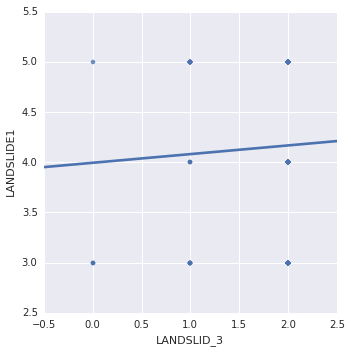

In [298]:
sns.lmplot(x='LANDSLID_3', y='LANDSLIDE1', data=walandslides, ci=None)

### Landslide liklihood vs. geologic unit

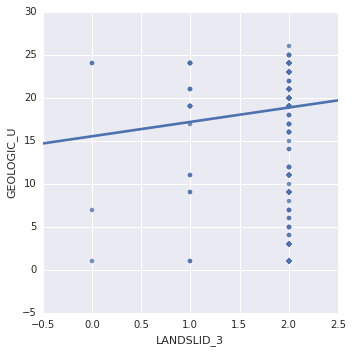

In [299]:
sns.lmplot(x='LANDSLID_3', y='GEOLOGIC_U', data=walandslides, ci=None)

### Landslide liklihood vs. Slope Morphology

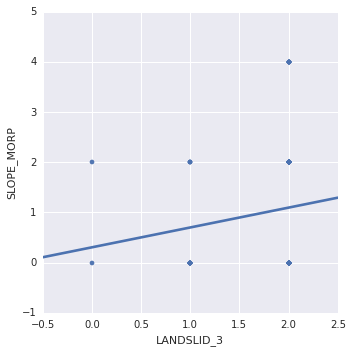

In [300]:
sns.lmplot(x='LANDSLID_3', y='SLOPE_MORP', data=walandslides, ci=None)

### Landslide liklihood vs. Gradient

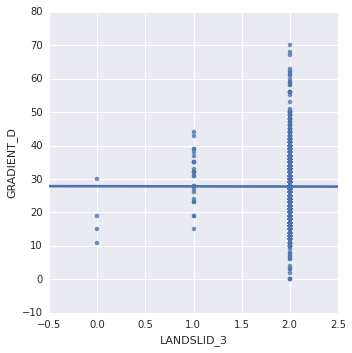

In [301]:
sns.lmplot(x='LANDSLID_3', y='GRADIENT_D', data=walandslides, ci=None)

### Landslide liklihood vs. Aspect

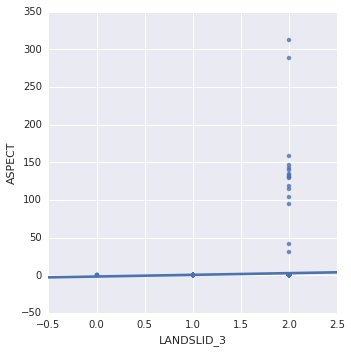

In [302]:
sns.lmplot(x='LANDSLID_3', y='ASPECT', data=walandslides, ci=None)